In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams


%matplotlib inline

# Opening JSON file
g = open('../data/genres.json')
 
# returns JSON object as a dictionary
genre_json = json.load(g)

# since the value lists have varying lengths, we have to use a lambda function to iterate over the keys and values as a series
genres = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in genre_json.items()]))

genres = genres.T

#genres = pd.melt(genres)

#genres = genres.reset_index(drop=True)
#genres.columns = ['artist', 'genre']

genres.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
The Jeff Healey Band,Blues,rock,jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Piotr Anderszewski,Classical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inigo Pascual,"Pinoy pop, OPM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Juans,Pop,pop rock,indie,neo soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cory Marks,Country,country rock,outlaw country,hard rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
genres_fix = genres[0].str.split(',', expand = True)
genres_fix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
The Jeff Healey Band,Blues,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Piotr Anderszewski,Classical,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Inigo Pascual,Pinoy pop,OPM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
The Juans,Pop,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Cory Marks,Country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [3]:
genres = genres.drop(0, axis = 1)
genres.head()

,1,2,3,4,5,6,7,8,9,10,11,12
The Jeff Healey Band,rock,jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Piotr Anderszewski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inigo Pascual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Juans,pop rock,indie,neo soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cory Marks,country rock,outlaw country,hard rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
genres_final = pd.merge(genres, genres_fix, left_index = True, right_index = True, how = 'outer')
pd.set_option('max_columns', None)
genres_final.head()

,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,0,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13,14,15,16
The Jeff Healey Band,rock,jazz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Blues,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Piotr Anderszewski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classical,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Inigo Pascual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pinoy pop,OPM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
The Juans,pop rock,indie,neo soul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Cory Marks,country rock,outlaw country,hard rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [5]:
genres_final['1_y'].head()

The Jeff Healey Band    None
Piotr Anderszewski      None
Inigo Pascual            OPM
The Juans               None
Cory Marks              None
Name: 1_y, dtype: object

In [6]:
genres_finalx2 = genres_final.T
genres_finalx2.head()

The Jeff Healey Band Piotr Anderszewski Inigo Pascual The Juans  \
1_x                 rock                NaN           NaN  pop rock   
2_x                 jazz                NaN           NaN     indie   
3_x                  NaN                NaN           NaN  neo soul   
4_x                  NaN                NaN           NaN       NaN   
5_x                  NaN                NaN           NaN       NaN   

         Cory Marks Big Smo Tommy Wright III Shaman's Harvest Pistol Annies  \
1_x    country rock     NaN      gangsta rap              NaN           NaN   
2_x  outlaw country     NaN       horrorcore              NaN           NaN   
3_x       hard rock     NaN              NaN              NaN           NaN   
4_x             NaN     NaN              NaN              NaN           NaN   
5_x             NaN     NaN              NaN              NaN           NaN   

    Vic Mensa              INXS Dimash Qudaibergen        Refused Kinto Sol  \
1_x  punk rap          pub rock                pop  hardcore punk       NaN   
2_x       NaN        dance-rock               folk            NaN       NaN   
3_x       NaN         funk rock          classical            NaN       NaN   
4_x       NaN  alternative rock              world            NaN       NaN   
5_x       NaN               NaN       operatic pop            NaN       NaN   

    Ton Koopman Counting Crows The McClures     Rival Sons the pillows  \
1_x         NaN     roots rock          NaN      hard rock         NaN   
2_x         NaN       pop rock          NaN  rock and roll         NaN   
3_x         NaN     jangle pop          NaN            NaN         NaN   
4_x         NaN            NaN          NaN            NaN         NaN   
5_x         NaN            NaN          NaN            NaN         NaN   

    Tom Odell Sunday Service Choir The Moody Blues Abel Korzeniowski Dave Koz  \
1_x       NaN    Christian hip hop        art rock         classical      NaN   
2_x       NaN        Christian R&B     psychedelia               NaN      NaN   
3_x       NaN                  NaN        pop rock               NaN      NaN   
4_x       NaN                  NaN  symphonic rock               NaN      NaN   
5_x       NaN                  NaN      proto-prog               NaN      NaN   

    Richard Elliot Vicente Fernández Cosmo Sheldrake Huey Lewis and the News  \
1_x            NaN  Canción ranchera      electronic                     NaN   
2_x            NaN          Mariachi     folktronica                     NaN   
3_x            NaN               NaN           indie                     NaN   
4_x            NaN               NaN             NaN                     NaN   
5_x            NaN               NaN             NaN                     NaN   

             Jodeci The Derek Trucks Band Ben E. King      A. R. Rahman  \
1_x    hip hop soul                   NaN         NaN  Indian classical   
2_x  new jack swing                   NaN         NaN       world music   
3_x             NaN                   NaN         NaN               NaN   
4_x             NaN                   NaN         NaN               NaN   
5_x             NaN                   NaN         NaN               NaN   

    The Pussycat Dolls Nicole Scherzinger Lomelda Duncan Mighty  \
1_x                pop              dance     NaN   African R&B   
2_x          dance-pop                R&B     NaN   world music   
3_x                NaN                NaN     NaN       hip hop   
4_x                NaN                NaN     NaN           NaN   
5_x                NaN                NaN     NaN           NaN   

           Ghost B.C. GASHI Francesco Tristano Mangli              Big Moe  \
1_x       heavy metal   NaN                NaN   folk  chopped and screwed   
2_x        doom metal   NaN                NaN    NaN                  NaN   
3_x          pop rock   NaN                NaN    NaN                  NaN   
4_x  progressive rock   NaN                NaN  

In [7]:
genres_melt = pd.melt(genres_finalx2)
genres_melt.head(60)

,variable,value
0,The Jeff Healey Band,rock
1,The Jeff Healey Band,jazz
2,The Jeff Healey Band,NaN
3,The Jeff Healey Band,NaN
4,The Jeff Healey Band,NaN
5,The Jeff Healey Band,NaN
6,The Jeff Healey Band,NaN
7,The Jeff Healey Band,NaN
8,The Jeff Healey Band,NaN
9,The Jeff Healey Band,NaN


In [8]:
genres_melt = genres_melt.dropna()

In [9]:
genres_melt.drop_duplicates()

,variable,value
0,The Jeff Healey Band,rock
1,The Jeff Healey Band,jazz
12,The Jeff Healey Band,Blues
41,Piotr Anderszewski,Classical
70,Inigo Pascual,Pinoy pop
...,...,...
123105,DJ Nelson,urbano
123117,DJ Nelson,Reggaeton
123146,Kendo Kaponi,Hip hop
123163,Ravyn Lenae,Neo soul


In [10]:
genres_melt.columns = ['Recording Artist', 'Genre']
genres_melt.head(30)

,Recording Artist,Genre
0,The Jeff Healey Band,rock
1,The Jeff Healey Band,jazz
12,The Jeff Healey Band,Blues
41,Piotr Anderszewski,Classical
70,Inigo Pascual,Pinoy pop
71,Inigo Pascual,OPM
87,The Juans,pop rock
88,The Juans,indie
89,The Juans,neo soul
99,The Juans,Pop


In [11]:
#Making genre column all capps

genres_melt['Genre'] = genres_melt['Genre'].str.upper()
genres_melt.head(60)

,Recording Artist,Genre
0,The Jeff Healey Band,ROCK
1,The Jeff Healey Band,JAZZ
12,The Jeff Healey Band,BLUES
41,Piotr Anderszewski,CLASSICAL
70,Inigo Pascual,PINOY POP
71,Inigo Pascual,OPM
87,The Juans,POP ROCK
88,The Juans,INDIE
89,The Juans,NEO SOUL
99,The Juans,POP


In [12]:
#Exploring dataset
genres_melt.tail(20)

,Recording Artist,Genre
123001,Spose,COMEDY HIP HOP
123002,Spose,ALTERNATIVE HIP HOP
123003,Spose,HIPSTER HOP HUMBLE RAP
123030,Justin Nozuka,FOLK
123031,Justin Nozuka,R&B
123047,GOT7,HIP HOP
123048,GOT7,TRAP
123049,GOT7,R&B
123059,GOT7,K-POP
123076,EXO,R&B


In [13]:
genres_melt.Genre.value_counts()

HIP HOP                      945
POP                          592
R&B                          544
ALTERNATIVE ROCK             258
TRAP                         228
                            ... 
 MINIMALISM                    1
DARKSYNTH                      1
POP\nR&B\n\nCOUNTRY MUSIC      1
FILM SONGS                     1
 HIPSTER HOP HUMBLE RAP        1
Name: Genre, Length: 1626, dtype: int64

In [14]:
genres_melt['Genre'].str.strip()

0              ROCK
1              JAZZ
12            BLUES
41        CLASSICAL
70        PINOY POP
            ...    
123105       URBANO
123117    REGGAETON
123146      HIP HOP
123163     NEO SOUL
123175          R&B
Name: Genre, Length: 12950, dtype: object

In [15]:
mlc = pd.read_csv('../data/MLC_Data_Sample.csv')
mlc_df = pd.DataFrame(mlc)
mlc_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,1.94923E+11,19,492,33.0,1/1/2021,Spotify,"13,620",MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
1,1.95757E+11,19,575,70.0,5/1/2021,Pandora,"12,160",Chris Webby,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
2,8.59716E+11,85,971,57.0,4/1/2021,Amazon,"2,451",Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
3,8.59716E+11,85,971,57.0,4/1/2021,Amazon,"2,451",Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
4,8.59717E+11,85,971,67.0,3/1/2021,Spotify,"69,876",Pacey Carroll,Pacey Carroll,The Frog and the Panda Bear,The Frog and the Panda Bear,88,0


In [16]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ISRC                                       98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [17]:
mlc_df = mlc_df.drop_duplicates()
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISRC                                       97701 non-null  object 
 1   Country Code                               97764 non-null  object 
 2   Registrant Code                            97764 non-null  object 
 3   Year of Reference                          97700 non-null  float64
 4   Usage Period                               91349 non-null  object 
 5   Streaming Platform (DSP)                   95452 non-null  object 
 6   Streams                                    99451 non-null  object 
 7   Recording Artist                           99451 non-null  object 
 8   Recording Label                            98444 non-null  object 
 9   Recording Title                            99451 non-null  object 
 10  Release Title         

In [18]:
#drop NA for MLC DF
mlc_df = mlc_df.dropna()

In [19]:
genres_df = pd.DataFrame(genres_melt)

In [20]:
mlc_and_genres_df = pd.merge(genres_df, mlc_df, on=["Recording Artist"], how='left')
mlc_and_genres_df.head()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,"43,448",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,"27,329",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0


In [21]:
mlc_and_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89448 entries, 0 to 89447
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Recording Artist                           89448 non-null  object 
 1   Genre                                      89448 non-null  object 
 2   ISRC                                       85299 non-null  object 
 3   Country Code                               85299 non-null  object 
 4   Registrant Code                            85299 non-null  object 
 5   Year of Reference                          85299 non-null  float64
 6   Usage Period                               85299 non-null  object 
 7   Streaming Platform (DSP)                   85299 non-null  object 
 8   Streams                                    85299 non-null  object 
 9   Recording Label                            85299 non-null  object 
 10  Recording Title       

In [22]:
mlc_and_genres_df.drop_duplicates()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,"43,448",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,"27,329",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89443,Ravyn Lenae,NEO SOUL,SEBGA1802428,SE,BGA,18.0,3/1/2021,Spotify,"13,363",Three Twenty Three Music Group,Venezuela Trains,Moon Shoes EP,250.0,1.0
89444,Ravyn Lenae,NEO SOUL,USUYG1047641,US,UYG,10.0,3/1/2021,Apple,"10,019",Three Twenty Three Music Group,Sleep Talking,Moon Shoes EP,254.0,1.0
89445,Ravyn Lenae,R&B,QM42K1778128,QM,42K,17.0,3/1/2021,Apple,"17,310",Three Twenty Three Music Group,Right of Spring,Moon Shoes EP,164.0,1.0
89446,Ravyn Lenae,R&B,SEBGA1802428,SE,BGA,18.0,3/1/2021,Spotify,"13,363",Three Twenty Three Music Group,Venezuela Trains,Moon Shoes EP,250.0,1.0


In [23]:
mlc_and_genres_df.dropna()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,"43,448",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,"27,329",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89443,Ravyn Lenae,NEO SOUL,SEBGA1802428,SE,BGA,18.0,3/1/2021,Spotify,"13,363",Three Twenty Three Music Group,Venezuela Trains,Moon Shoes EP,250.0,1.0
89444,Ravyn Lenae,NEO SOUL,USUYG1047641,US,UYG,10.0,3/1/2021,Apple,"10,019",Three Twenty Three Music Group,Sleep Talking,Moon Shoes EP,254.0,1.0
89445,Ravyn Lenae,R&B,QM42K1778128,QM,42K,17.0,3/1/2021,Apple,"17,310",Three Twenty Three Music Group,Right of Spring,Moon Shoes EP,164.0,1.0
89446,Ravyn Lenae,R&B,SEBGA1802428,SE,BGA,18.0,3/1/2021,Spotify,"13,363",Three Twenty Three Music Group,Venezuela Trains,Moon Shoes EP,250.0,1.0


In [24]:
royalties = pd.read_csv('../data/royalties_per_platform.csv')
royalties.head(10)                        

,platform,royalties_per_stream,source
0,Tidal,$0.012840,https://producerhive.com/music-marketing-tips/...
1,Apple,$0.008000,https://producerhive.com/music-marketing-tips/...
2,Amazon,$0.004020,https://producerhive.com/music-marketing-tips/...
3,Spotify,$0.003180,https://producerhive.com/music-marketing-tips/...
4,YouTube,$0.002000,https://producerhive.com/music-marketing-tips/...
5,Pandora,$0.001330,https://producerhive.com/music-marketing-tips/...
6,Deezer,$0.001100,https://producerhive.com/music-marketing-tips/...
7,SoundCloud,$0.003275,https://producerhive.com/music-marketing-tips/...


In [25]:
royalties = royalties.drop(columns=['source'])
royalties.head(10)

,platform,royalties_per_stream
0,Tidal,$0.012840
1,Apple,$0.008000
2,Amazon,$0.004020
3,Spotify,$0.003180
4,YouTube,$0.002000
5,Pandora,$0.001330
6,Deezer,$0.001100
7,SoundCloud,$0.003275


In [26]:
royalties_df = pd.DataFrame(royalties)
royalties_df.head(10)

,platform,royalties_per_stream
0,Tidal,$0.012840
1,Apple,$0.008000
2,Amazon,$0.004020
3,Spotify,$0.003180
4,YouTube,$0.002000
5,Pandora,$0.001330
6,Deezer,$0.001100
7,SoundCloud,$0.003275


In [27]:
royalties_df.rename(columns = {'platform':'Streaming Platform (DSP)', 'royalties_per_stream':'Royalties per Stream'}, inplace = True)

In [28]:
royalties_df.head()

,Streaming Platform (DSP),Royalties per Stream
0,Tidal,$0.012840
1,Apple,$0.008000
2,Amazon,$0.004020
3,Spotify,$0.003180
4,YouTube,$0.002000


In [29]:
mlcGenresRoyalties_df = pd.merge(mlc_and_genres_df, royalties_df, on=['Streaming Platform (DSP)'], how='left')


In [30]:
mlcGenresRoyalties_df.head()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",Royalties per Stream
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,"2,463",Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,"43,448",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0,$0.008000
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,"27,329",Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0,$0.008000


In [31]:
mlcGenresRoyalties_df["Streams"] = mlcGenresRoyalties_df["Streams"].str.replace(",","")
mlcGenresRoyalties_df.head()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",Royalties per Stream
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,43448,Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0,$0.008000
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,27329,Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0,$0.008000


In [32]:
duplicates = mlcGenresRoyalties_df[mlcGenresRoyalties_df.duplicated()]
duplicates

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",Royalties per Stream
425,Sidhu Moose Wala,R&B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
mlcGenresRoyalties_df = mlcGenresRoyalties_df.drop_duplicates()

In [34]:
new_duplicates = mlcGenresRoyalties_df[mlcGenresRoyalties_df.duplicated()]
new_duplicates

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",Royalties per Stream


In [35]:
nulls = mlcGenresRoyalties_df.isnull().sum()
nulls

Recording Artist                                0
Genre                                           0
ISRC                                         4148
Country Code                                 4148
Registrant Code                              4148
Year of Reference                            4148
Usage Period                                 4148
Streaming Platform (DSP)                     4148
Streams                                      4148
Recording Label                              4148
Recording Title                              4148
Release Title                                4148
Recording Duration (Seconds)                 4148
Songwriter's Listed (1 = "Yes", 0 = "No")    4148
Royalties per Stream                         8907
dtype: int64

In [36]:
mlcGenresRoyalties_df = mlcGenresRoyalties_df.dropna()
new_nulls = mlcGenresRoyalties_df.isnull().sum()
new_nulls

Recording Artist                             0
Genre                                        0
ISRC                                         0
Country Code                                 0
Registrant Code                              0
Year of Reference                            0
Usage Period                                 0
Streaming Platform (DSP)                     0
Streams                                      0
Recording Label                              0
Recording Title                              0
Release Title                                0
Recording Duration (Seconds)                 0
Songwriter's Listed (1 = "Yes", 0 = "No")    0
Royalties per Stream                         0
dtype: int64

In [37]:
mlcGenresRoyalties_df['Streams'] = pd.to_numeric(mlcGenresRoyalties_df['Streams'])

In [38]:
mlcGenresRoyalties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80540 entries, 0 to 89447
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Recording Artist                           80540 non-null  object 
 1   Genre                                      80540 non-null  object 
 2   ISRC                                       80540 non-null  object 
 3   Country Code                               80540 non-null  object 
 4   Registrant Code                            80540 non-null  object 
 5   Year of Reference                          80540 non-null  float64
 6   Usage Period                               80540 non-null  object 
 7   Streaming Platform (DSP)                   80540 non-null  object 
 8   Streams                                    80540 non-null  int64  
 9   Recording Label                            80540 non-null  object 
 10  Recording Title       

In [39]:
mlcGenresRoyalties_df.head()

,Recording Artist,Genre,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")",Royalties per Stream
0,The Jeff Healey Band,ROCK,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
1,The Jeff Healey Band,JAZZ,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
2,The Jeff Healey Band,BLUES,USUM72104709,US,UM7,21.0,1/1/2021,Amazon,2463,Arista,Angel Eyes (Album Edit),Master Hits,280.0,1.0,$0.004020
3,Piotr Anderszewski,CLASSICAL,GBSMU8689004,GB,SMU,86.0,5/1/2021,Apple,43448,Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",320.0,1.0,$0.008000
4,Piotr Anderszewski,CLASSICAL,QZFZ62111680,QZ,FZ6,21.0,1/1/2021,Apple,27329,Warner Classics,"Well-Tempered Clavier, Book 2, Prelude and Fug...","Bach: Well-Tempered Clavier, Book 2 (Excerpts)",212.0,1.0,$0.008000


In [40]:
mlcGenresRoyalties_df['Royalties per Stream'] = mlcGenresRoyalties_df['Royalties per Stream'].str.replace("$","")
mlcGenresRoyalties_df['Royalties per Stream'] = pd.to_numeric(mlcGenresRoyalties_df['Royalties per Stream'])

C:\Users\jrtho\AppData\Local\Temp/ipykernel_15976/145274344.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mlcGenresRoyalties_df['Royalties per Stream'] = mlcGenresRoyalties_df['Royalties per Stream'].str.replace("$","")


In [41]:
mlcGenresRoyalties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80540 entries, 0 to 89447
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Recording Artist                           80540 non-null  object 
 1   Genre                                      80540 non-null  object 
 2   ISRC                                       80540 non-null  object 
 3   Country Code                               80540 non-null  object 
 4   Registrant Code                            80540 non-null  object 
 5   Year of Reference                          80540 non-null  float64
 6   Usage Period                               80540 non-null  object 
 7   Streaming Platform (DSP)                   80540 non-null  object 
 8   Streams                                    80540 non-null  int64  
 9   Recording Label                            80540 non-null  object 
 10  Recording Title       

In [42]:
#mlcGenresRoyalties_df = mlcGenresRoyalties_df.head(10)
commonGenres = mlcGenresRoyalties_df['Genre'].value_counts()
commonGenres_df = pd.DataFrame(commonGenres).reset_index()
commonGenres2 = commonGenres_df.head(10)
commonGenres2

,index,Genre
0,HIP HOP,12084
1,TRAP,4247
2,R&B,3508
3,POP,3211
4,COUNTRY,1794
5,ROCK,1529
6,GANGSTA RAP,1445
7,ALTERNATIVE ROCK,1418
8,POP ROCK,1172
9,SOUTHERN HIP HOP,931


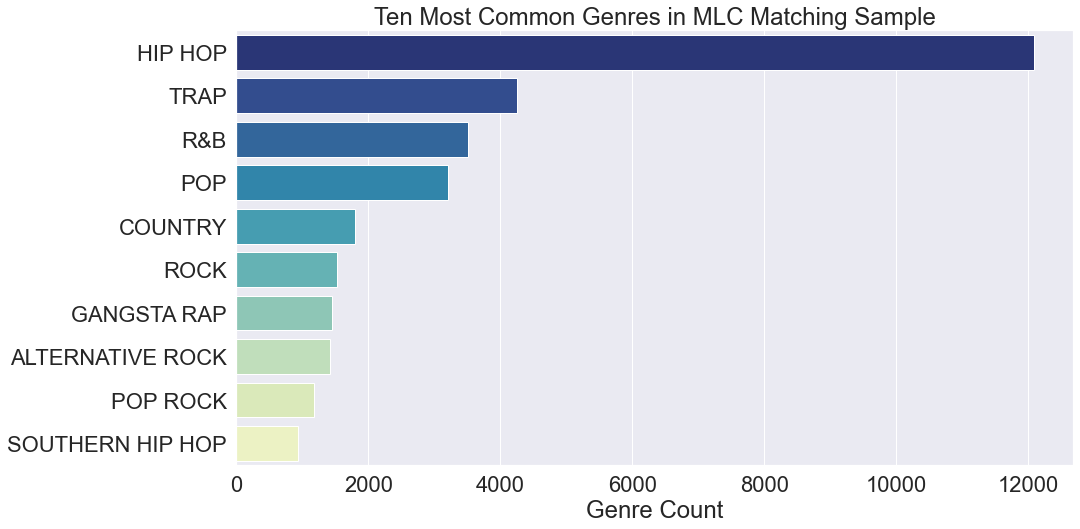

In [43]:
rcParams['figure.figsize'] = 15,8
sns.set(font_scale = 2)
commonGenres2 = sns.barplot(x="Genre", y="index", data=commonGenres2,
                 palette="YlGnBu_r")
commonGenres2.set(ylabel= None)
commonGenres2.set(xlabel="Genre Count")
commonGenres2.set_title('Ten Most Common Genres in MLC Matching Sample');




In [44]:
mlcGenresRoyalties_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80540 entries, 0 to 89447
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Recording Artist                           80540 non-null  object 
 1   Genre                                      80540 non-null  object 
 2   ISRC                                       80540 non-null  object 
 3   Country Code                               80540 non-null  object 
 4   Registrant Code                            80540 non-null  object 
 5   Year of Reference                          80540 non-null  float64
 6   Usage Period                               80540 non-null  object 
 7   Streaming Platform (DSP)                   80540 non-null  object 
 8   Streams                                    80540 non-null  int64  
 9   Recording Label                            80540 non-null  object 
 10  Recording Title       

In [45]:
#Number of Streams per Genre
#avgStreamsPerGenre = mlcGenresRoyalties_df.groupby('Genre')[['Streams']].mean()
#avgStreamsPerGenreDesc = avgStreamsPerGenre.sort_values(['Streams'], ascending=False)
#avgStreamsPerGenreDesc


genre_streams_avg = mlcGenresRoyalties_df.groupby('Genre', as_index=False)[['Streams']].mean().sort_values(['Streams'],ascending=False)
genre_streams_avg = genre_streams_avg.head(10)
genre_streams_avg


,Genre,Streams
1006,PIANO ROCK,1.382509e+06
349,SHOW TUNES,1.033586e+06
1126,SHOW TUNES,5.208310e+05
529,BRO-COUNTRY,4.726122e+05
1193,TECHNOBANDA,4.519870e+05
282,OLD SCHOOL HIP HOP,4.109610e+05
458,ALTERNATIVE POP,3.857078e+05
1153,SOUL-TRAP,3.691845e+05
916,MELBOURNE BOUNCE,3.612108e+05
1168,STONER ROCK,3.125850e+05


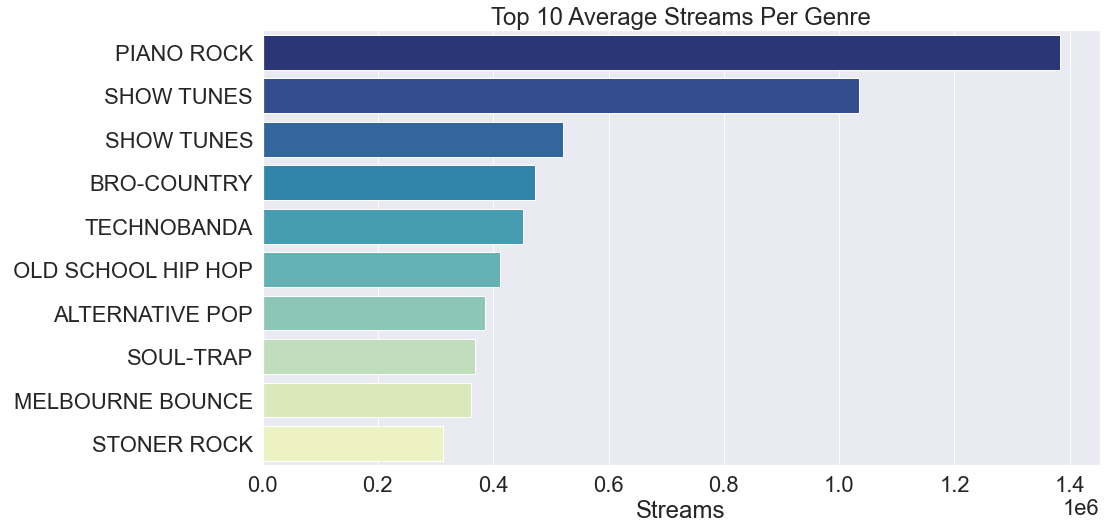

In [47]:
rcParams['figure.figsize'] = 15,8
sns.set(font_scale = 2)
genreStreamsAvgChart = sns.barplot(x="Streams", y="Genre", data=genre_streams_avg,
                 palette="YlGnBu_r")
genreStreamsAvgChart.set(ylabel=None)
genreStreamsAvgChart.set_title('Top 10 Average Streams Per Genre');

